In [10]:
%matplotlib inline

In [11]:
import numpy as np
import pandas as pd
from os import listdir

import scipy, math

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
batter_files = [ file for file in listdir('batter_data') if file.endswith('.csv')]


i = 1
for file in batter_files[i:i+1]:
    print 'file:', file
    batter = pd.read_csv('batter_data/'+file, header=0)
        
print 'Number of Pitches:', len(batter)

# Get batter name
player_ids = pd.read_csv('player_ids.csv', header=0)
i = player_ids[player_ids.MLBCODE==int(file[:6])].index[0]
batter_name = player_ids.iloc()[i].FIRSTNAME + ' ' + player_ids.iloc()[i].LASTNAME
print 'Batter:', batter_name

file: 110236.csv
Number of Pitches: 588
Batter: Garret Anderson


In [13]:
# Relative Frequency of Ball, In-Play, Strike, and Foul per Zone

strike = []
in_play = []
ball = []
foul = []

for des in batter.des:
    if 'Strike' in des: strike.append(1)
    else: strike.append(0)
    if 'In play' in des: in_play.append(1)
    else: in_play.append(0)
    if 'Ball' in des: ball.append(1)
    else: ball.append(0)
    if 'Foul' in des: foul.append(1)
    else: foul.append(0)

batter2 = batter[['zone', 'end_speed']]
batter2.loc[:, 'strike'] = strike
batter2.loc[:, 'in_play'] = in_play
batter2.loc[:, 'ball'] = ball
batter2.loc[:, 'foul'] = foul

batter2.loc[:, 'totals'] = np.ones(len(batter2))
batter3 = batter2[['strike', 'totals', 'zone']].groupby('zone').sum()
rf_strike = np.array(batter3.strike / batter3.totals)

batter3 = batter2[['in_play', 'totals', 'zone']].groupby('zone').sum()
rf_in_play = np.array(batter3.in_play / batter3.totals)

batter3 = batter2[['ball', 'totals', 'zone']].groupby('zone').sum()
rf_ball = np.array(batter3.ball / batter3.totals)

batter3 = batter2[['foul', 'totals', 'zone']].groupby('zone').sum()
rf_foul = np.array(batter3.foul / batter3.totals)


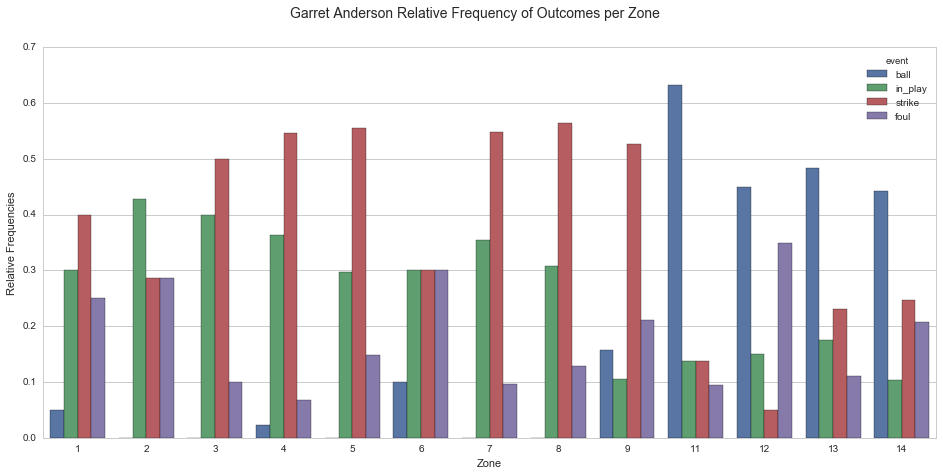

In [14]:
# Generate bar plot showing relative frequencies of 'ball', 'in_play', 'strike', 'foul' for each zone

zone = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14 ] * 4    # note 10 does not exist on the MLB map
event = ['ball']*13 + ['in_play']*13 + ['strike']*13 + ['foul']*13

pbl_zone = list(rf_ball) + list(rf_in_play) + list(rf_strike) + list(rf_foul)
data = pd.DataFrame( zip(zone, event, pbl_zone), columns = ['zone', 'event', 'pbl_zone'])

a4_dims = (16, 7)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=a4_dims)
ax.figure.suptitle('%s Relative Frequency of Outcomes per Zone' % batter_name, fontsize=14)
sns.barplot(ax=ax, x=data.zone, y=data.pbl_zone, hue=data.event)
ax.set_xlabel('Zone')
ax.set_ylabel('Relative Frequencies')

In [15]:
# Strike Zone Heat Map
# Percentage of Strikes per Pitches Thrown in a Particular Zone

sp = list(data[data.event=='strike'].pbl_zone)
SP=sp
sp = [sp[0]]*4 + [sp[1]]*4 + [sp[2]]*4 + [sp[3]]*4 + [sp[4]]*4 + [sp[5]]*4 + [sp[6]]*4 + [sp[7]]*4 + [sp[8]]*4 + \
[sp[9]]*7 + [sp[10]]*7 + [sp[11]]*7 + [sp[12]]*7

ip = list(data[data.event=='in_play'].pbl_zone)
IP = ip
ip = [ip[0]]*4 + [ip[1]]*4 + [ip[2]]*4 + [ip[3]]*4 + [ip[4]]*4 + [ip[5]]*4 + [ip[6]]*4 + [ip[7]]*4 + [ip[8]]*4 + \
[ip[9]]*7 + [ip[10]]*7 + [ip[11]]*7 + [ip[12]]*7

bp = list(data[data.event=='ball'].pbl_zone)
BP = bp
bp = [bp[0]]*4 + [bp[1]]*4 + [bp[2]]*4 + [bp[3]]*4 + [bp[4]]*4 + [bp[5]]*4 + [bp[6]]*4 + [bp[7]]*4 + [bp[8]]*4 + \
[bp[9]]*7 + [bp[10]]*7 + [bp[11]]*7 + [bp[12]]*7

fp = list(data[data.event=='foul'].pbl_zone)
FP = fp
fp = [fp[0]]*4 + [fp[1]]*4 + [fp[2]]*4 + [fp[3]]*4 + [fp[4]]*4 + [fp[5]]*4 + [fp[6]]*4 + [fp[7]]*4 + [fp[8]]*4 + \
[fp[9]]*7 + [fp[10]]*7 + [fp[11]]*7 + [fp[12]]*7

# Map the zone to the geometric strike zone
x = [ 1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6,\
0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7]
y = [ 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6,\
3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 4]


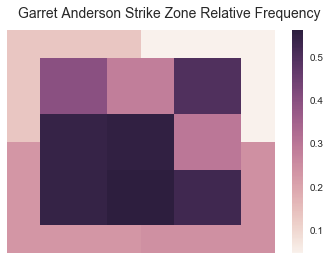

In [16]:
# Strikes per Zone Heat Map
heat = pd.DataFrame({'sp':sp, 'x':x,'y': y})
heat = heat.pivot("y", "x", "sp")
ax = sns.heatmap(heat, xticklabels = False, yticklabels = False)
ax.figure.suptitle('%s Strike Zone Relative Frequency' % batter_name, fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

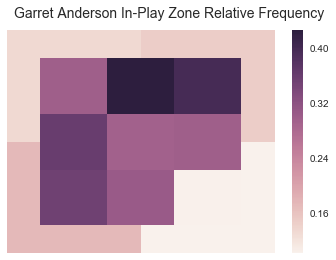

In [17]:
# In-Play per Zone Heat Map
heat = pd.DataFrame({'ip':ip, 'x':x,'y': y})
heat = heat.pivot("y", "x", "ip")
ax = sns.heatmap(heat, xticklabels = False, yticklabels = False)
ax.figure.suptitle('%s In-Play Zone Relative Frequency' % batter_name, fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

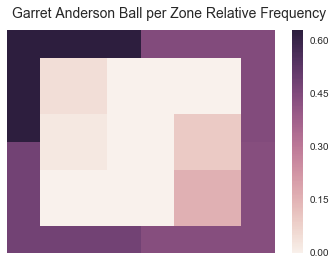

In [18]:
# Ball per Zone Heat Map
heat = pd.DataFrame({'bp':bp, 'x':x,'y': y})
heat = heat.pivot("y", "x", "bp")
ax = sns.heatmap(heat, xticklabels = False, yticklabels = False)
ax.figure.suptitle('%s Ball per Zone Relative Frequency' % batter_name, fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

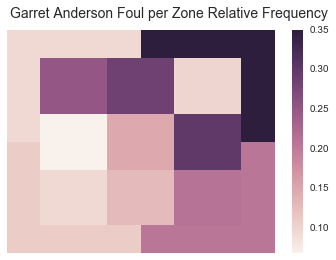

In [19]:
# Foul per Zone Heat Map
heat = pd.DataFrame({'fp':fp, 'x':x,'y': y})
heat = heat.pivot("y", "x", "fp")
ax = sns.heatmap(heat, xticklabels = False, yticklabels = False)
ax.figure.suptitle('%s Foul per Zone Relative Frequency' % batter_name, fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

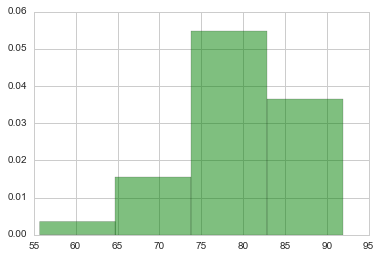

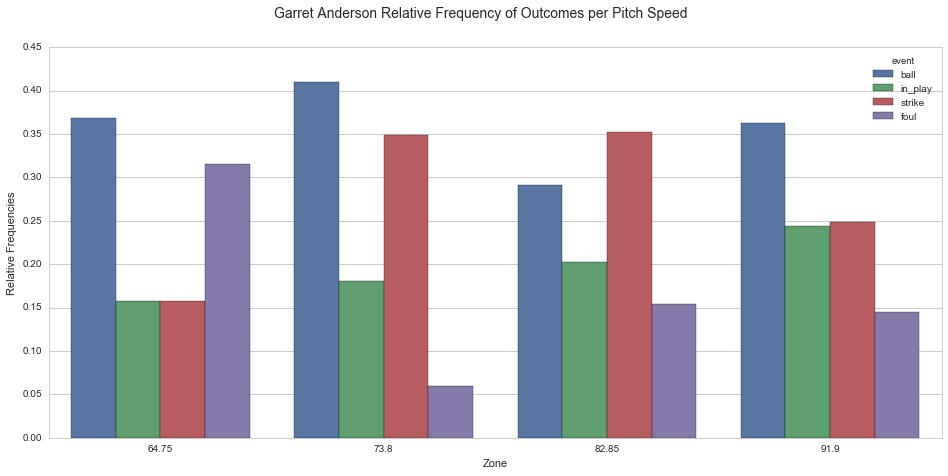

In [20]:
# Strikes vs Speed

speed = batter.end_speed
n, bins, patches = plt.hist(speed, bins=4, normed=1, facecolor='green', alpha=0.5)
b_bins = pd.cut(speed, bins, right=False)



batter2.loc[:, 'discrete_speed'] = b_bins
batter3 = batter2[['strike', 'totals', 'discrete_speed']].groupby('discrete_speed').sum()
rf_strike_given_speed = np.array(batter3.strike / batter3.totals)

batter3 = batter2[['in_play', 'totals', 'discrete_speed']].groupby('discrete_speed').sum()
rf_in_play_given_speed = np.array(batter3.in_play / batter3.totals)

batter3 = batter2[['ball', 'totals', 'discrete_speed']].groupby('discrete_speed').sum()
rf_ball_given_speed = np.array(batter3.ball / batter3.totals)

batter3 = batter2[['foul', 'totals', 'discrete_speed']].groupby('discrete_speed').sum()
rf_foul_given_speed = np.array(batter3.foul / batter3.totals)

speed = list(bins[1:]) * 4    # discretized speed
event = ['ball']*(len(bins)-1) + ['in_play']*(len(bins)-1) + ['strike']*(len(bins)-1) + ['foul']*(len(bins)-1)

pbl_speed = list(rf_ball_given_speed) + list(rf_in_play_given_speed) + list(rf_strike_given_speed) + list(rf_foul_given_speed)
data = pd.DataFrame( zip(speed, event, pbl_speed), columns = ['speed', 'event', 'pbl_speed'])

a4_dims = (16, 7)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=a4_dims)
ax.figure.suptitle('%s Relative Frequency of Outcomes per Pitch Speed' % batter_name, fontsize=14)
sns.barplot(ax=ax, x=data.speed, y=data.pbl_speed, hue=data.event)
ax.set_xlabel('Zone')
ax.set_ylabel('Relative Frequencies')


In [ ]:
# strike vs Speed

speed = batter.end_speed
n, bins, patches = plt.hist(speed, bins=4, normed=1, facecolor='green', alpha=0.5)
b_bins = pd.cut(speed, bins, right=False)


batter2 = batter
batter2['strike'] = strike
batter2['discrete_speed'] = b_bins
batter3 = batter2[['strike', 'totals', 'discrete_speed']].groupby('discrete_speed').sum()
rf_strikes_given_speed = np.array(batter3.in_play / batter3.totals)
print rf_strikes_given_speed

g = sns.barplot(batter3.index, batter3.in_play/batter3.totals, palette="Reds_d")

[ 0.1         0.17027864  0.13967311  0.16798773]


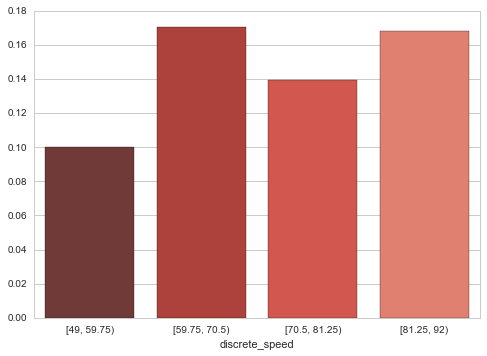

In [224]:
# inplay vs Speed

speed = batter.end_speed
n, bins, patches = plt.hist(speed, bins=4, normed=1, facecolor='green', alpha=0.5)
b_bins = pd.cut(speed, bins, right=False)


batter2 = batter
batter2['in_play'] = in_play
batter2['discrete_speed'] = b_bins
batter3 = batter2[['in_play', 'totals', 'discrete_speed']].groupby('discrete_speed').sum()
rf_strikes_given_speed = np.array(batter3.in_play / batter3.totals)
print rf_strikes_given_speed

g = sns.barplot(batter3.index, batter3.in_play/batter3.totals, palette="Reds_d")

[ 0.7         0.49535604  0.43573551  0.39069292]


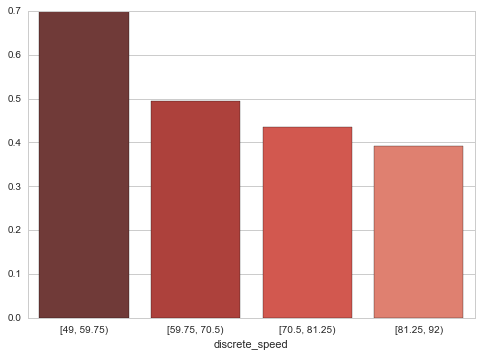

In [225]:
# ball vs Speed

speed = batter.end_speed
n, bins, patches = plt.hist(speed, bins=4, normed=1, facecolor='green', alpha=0.5)
b_bins = pd.cut(speed, bins, right=False)


batter2 = batter
batter2['ball'] = ball
batter2['discrete_speed'] = b_bins
batter3 = batter2[['ball', 'totals', 'discrete_speed']].groupby('discrete_speed').sum()
rf_strikes_given_speed = np.array(batter3.ball / batter3.totals)
print rf_strikes_given_speed

g = sns.barplot(batter3.index, batter3.ball/batter3.totals, palette="Reds_d")

[ 0.          0.05882353  0.10364042  0.13986193]


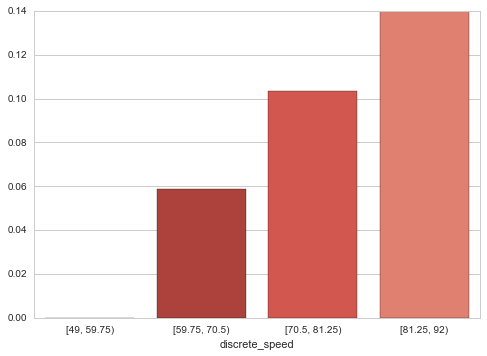

In [226]:
# foul vs Speed

speed = batter.end_speed
n, bins, patches = plt.hist(speed, bins=4, normed=1, facecolor='green', alpha=0.5)
b_bins = pd.cut(speed, bins, right=False)


batter2 = batter
batter2['foul'] = foul
batter2['discrete_speed'] = b_bins
batter3 = batter2[['foul', 'totals', 'discrete_speed']].groupby('discrete_speed').sum()
rf_strikes_given_speed = np.array(batter3.foul / batter3.totals)
print rf_strikes_given_speed

g = sns.barplot(batter3.index, batter3.foul/batter3.totals, palette="Reds_d")

In [228]:
# Combine 2 batter features: speed and zone
# 52 features
#zone1 and bin1, zone1 and bin2, ... zone13 and bin4
# Make a matrix?
# Make a list, bin and speed
# sum the elements of resulatant matrix from Hadamard product
# compile 2, 52 element arrays of size (4, 13)






Choose a Pitcher

In [21]:
# Choose a Pitcher

files = [ file for file in listdir('pitcher_data') if file.endswith('.csv')]
i = 2

for file in files[i:i+1]:
    print file
    pitcher = pd.read_csv('pitcher_data/'+file, header=0)
print len(pitcher)

# Get pitcher name
i = player_ids[player_ids.MLBCODE==int(file[:6])].index[0]
pitcher_name = player_ids.iloc()[i].FIRSTNAME + ' ' + player_ids.iloc()[i].LASTNAME
print 'Pitcher:', pitcher_name

592804.csv
2598
Pitcher: Tyler Thornburg


Pitching Speed Skew: -0.786000466663
Mean Pitching Speed: 80.3958429561
Pitch Speed Std: 6.2050054016
Max (End) Pitch Speed: 88.8
Max (Start) Pitch Speed: 96.5
Min (End) Pitch Speed: 48.1
Min (Start) Pitch Speed: 50.4
Greatest Breaking Ball Speed Difference: 10.3


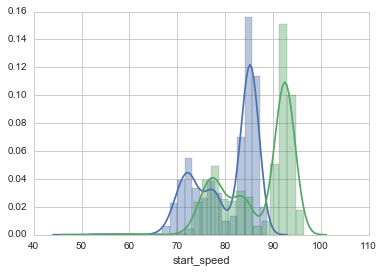

In [22]:
# Interesting Statistics and Obversations

print "Pitching Speed Skew:", scipy.stats.skew(pitcher.end_speed, axis=0, bias=True)
print "Mean Pitching Speed:", scipy.mean(pitcher.end_speed)
print "Pitch Speed Std:",scipy.std(pitcher.end_speed)
print "Max (End) Pitch Speed:", max(pitcher.end_speed)
print "Max (Start) Pitch Speed:", max(pitcher.start_speed)
print "Min (End) Pitch Speed:", min(pitcher.end_speed)
print "Min (Start) Pitch Speed:", min(pitcher.start_speed)
print "Greatest Breaking Ball Speed Difference:", max(pitcher.start_speed - pitcher.end_speed)
                                                     
                                                     

sns.distplot(pitcher.end_speed)
sns.distplot(pitcher.start_speed)


Percent outside of the strike zone: 0.610854503464


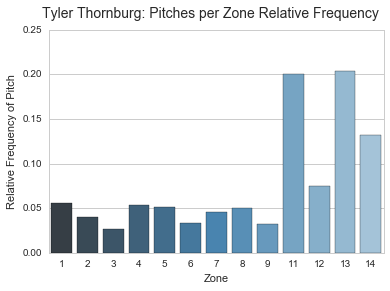

In [23]:
# Relative Frequency of Pitches per Zone



pitcher2 = pitcher

pitcher2['totals'] = np.ones(len(pitcher2))
pitcher2 = pitcher2[['totals', 'zone']].groupby('zone').sum()/len(pitcher)

sns.set_style('whitegrid')
g = sns.barplot(x = pitcher2.index, y = pitcher2.totals, palette="Blues_d")

rf_pitch_per_zone = list(pitcher2.totals)
print "Percent outside of the strike zone:",  sum(rf_pitch_per_zone[-4:])

g.figure.suptitle('%s: Pitches per Zone Relative Frequency' % pitcher_name, fontsize='14') 


g.set_xlabel('Zone')
g.set_ylabel('Relative Frequency of Pitch')


In [25]:
pitch_zone = np.array(rf_pitch_per_zone)


print "Pbl Strike:", sum(pitch_zone * SP)
print "Pbl In play:", sum(pitch_zone * IP)
print "Pbl Ball:", sum(pitch_zone * BP)
print "Pbl Foul:", sum(pitch_zone * FP)

 Pbl Strike: 0.29594046528
Pbl In play: 0.212527155722
Pbl Ball: 0.32936339824
Pbl Foul: 0.162168980758


Batter: Garret Anderson vs Pitcher: Tyler Thornburg
Num of Strikeouts 4759
Num of Hits in Play 13828
Num of Walks 1413
   Probability of Ball in Play  Probability of Strike Out  Probability of Walk
1                       0.6914                    0.23795              0.07065
2                       0.6914                    0.23795              0.07065
3                       0.6914                    0.23795              0.07065
Include average results, pre-calculated and stored or taken from the mlb site for the most recent or all years.


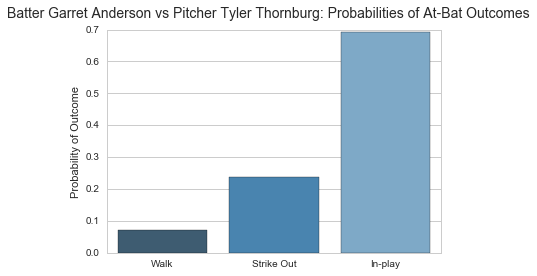

In [27]:
# Simulate an at-bat

pbl_strike = sum(pitch_zone * SP)
pbl_inplay = sum(pitch_zone * IP)
pbl_ball = sum(pitch_zone * BP)
pbl_foul = sum(pitch_zone * FP)

des_strikeout = 0
des_inplay = 0
des_walk = 0
N = 20000
for j in range(N):
    i = 0
    strike_count = 0
    inplay_count = 0
    ball_count = 0
    foul_count = 0

    while 1:

        i += 1
        n = np.random.random(1)

        if n < pbl_strike: strike_count += 1
        elif pbl_strike <= n < pbl_strike + pbl_inplay: inplay_count += 1
        elif pbl_strike + pbl_inplay <= n < pbl_strike + pbl_inplay + pbl_ball: ball_count += 1
        elif pbl_strike + pbl_inplay + pbl_ball <= n: 
            foul_count += 1
            if strike_count < 2: strike_count+=1
        else: print "problem with counter"

        if strike_count == 3: des_strikeout+=1; break
        if inplay_count == 1: des_inplay+=1; break
        if ball_count == 4: des_walk+=1; break

    #print "Number of Pitches:", i, "\n"
    #print strike_count
    #print inplay_count
    #print ball_count
    #print foul_count
print "Batter:", batter_name, 'vs', 'Pitcher:', pitcher_name
print "Num of Strikeouts", des_strikeout
print "Num of Hits in Play", des_inplay
print "Num of Walks", des_walk
N = float(N)


heads_up_results = pd.DataFrame({'Probability of Strike Out':(des_strikeout/N), 'Probability of Ball in Play':\
                                 (des_inplay/N), 'Probability of Walk':(des_walk/N)}, index=[1, 2, 3])

print heads_up_results
sns.set_style('whitegrid')
g = sns.barplot(x = ['Walk', 'Strike Out', 'In-play'], y = [des_walk/N, des_strikeout/N, des_inplay/N], \
                palette="Blues_d")

g.figure.suptitle('Batter %s vs Pitcher %s: Probabilities of At-Bat Outcomes' % (batter_name, pitcher_name), fontsize='14') 
g.set_xlabel('')
g.set_ylabel('Probability of Outcome')
print "Include average results, pre-calculated and stored or taken from the mlb site for the most recent or all years."

In [28]:

''' remap the strike zone indexing to correspond with actual strike zone geometry
0: 11 11 11 11 12 12 12 12
1: 11 1  1  2  2  3  3  12
2: 11 1  1  2  2  3  3  12
3: 11 4  4  5  5  6  6  12
4: 13 4  4  5  5  6  6  14
5: 13 7  7  8  8  9  9  14
6: 13 7  7  8  8  9  9  14
7: 13 13 13 13 14 14 14 14
   0  1  2  3  4  5  6  7
   
x = [ 1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6,\
0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7]
y = [ 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6,\
3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 4]
1:(1, 6), (2, 6), (1, 5), (2, 5)
2:(3, 6), (4, 6), (3, 5), (4, 5)
3:(5, 6), (6, 6), (5, 5), (6, 5)
4:(1, 4), (2, 4), (1, 3), (2, 3)
5:(3, 4), (4, 4), (3, 3), (4, 3)
6:(5, 4), (6, 4), (5, 3), (6, 3)
7:(1, 2), (2, 2), (1, 1), (2, 1)
8:(3, 2), (4, 2), (3, 1), (4, 1)
9:(5, 2), (6, 2), (5, 1), (6, 1)
11:(7, 3), (7, 2), (7, 1), (7, 0), (6, 0), (5, 0), (4, 0)
12:(3, 0), (2, 0), (1, 0), (0, 0), (0, 1), (0, 2), (0, 3)
13:(0, 4), (0, 5), (0, 6), (0, 7), (1, 7), (2, 7), (3, 7)
14:(4, 7), (5, 7), (6, 7), (7, 7), (7, 6), (7, 5), (7, 4)
'''



' remap the strike zone indexing to correspond with actual strike zone geometry\n0: 11 11 11 11 12 12 12 12\n1: 11 1  1  2  2  3  3  12\n2: 11 1  1  2  2  3  3  12\n3: 11 4  4  5  5  6  6  12\n4: 13 4  4  5  5  6  6  14\n5: 13 7  7  8  8  9  9  14\n6: 13 7  7  8  8  9  9  14\n7: 13 13 13 13 14 14 14 14\n   0  1  2  3  4  5  6  7\n   \nx = [ 1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6,0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7]\ny = [ 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6,3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 4]\n1:(1, 6), (2, 6), (1, 5), (2, 5)\n2:(3, 6), (4, 6), (3, 5), (4, 5)\n3:(5, 6), (6, 6), (5, 5), (6, 5)\n4:(1, 4), (2, 4), (1, 3), (2, 3)\n5:(3, 4), (4, 4), (3, 3), (4, 3)\n6:(5, 4), (6, 4), (5, 3), (6, 3)\n7:(1, 2), (2, 2), (1, 1), (2, 1)\n8:(3, 2), (4, 2), (3, 1), (4,